In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_df = pd.read_csv('/content/train_strict_domain.csv')
test_df = pd.read_csv('/content/test_strict_domain.csv')
val_df = pd.read_csv('/content/val_strict_domain.csv')

# Handle missing values in 'text' column
train_df.dropna(subset=['text'], inplace=True)
test_df.dropna(subset=['text'], inplace=True)
val_df.dropna(subset=['text'], inplace=True)

# Parameters for text processing
vocab_size = 10000
embedding_dim = 100
max_length = 100
# oov_token = "<OOV>" # Out of vocabulary token - not used in this example

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
test_labels = label_encoder.transform(test_df['label'])
val_labels = label_encoder.transform(val_df['label'])

num_classes = len(label_encoder.classes_)

print("Data loading and preprocessing complete.")
print("Training data shape:", train_padded.shape)
print("Testing data shape:", test_padded.shape)
print("Validation data shape:", val_padded.shape)
print("Number of classes:", num_classes)

Data loading and preprocessing complete.
Training data shape: (21000, 100)
Testing data shape: (4500, 100)
Validation data shape: (4500, 100)
Number of classes: 3


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional

# Define the model
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(64, return_sequences=True)),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_padded,
    train_labels,
    epochs=10,  # You can adjust the number of epochs
    validation_data=(val_padded, val_labels),
    verbose=1
)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.6580 - val_loss: 7.9692
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9958 - loss: 0.0112 - val_accuracy: 0.6509 - val_loss: 8.2271
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9935 - loss: 0.0145 - val_accuracy: 0.6558 - val_loss: 8.3658
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.6500 - val_loss: 8.6377
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9939 - loss: 0.0164 - val_accuracy: 0.6509 - val_loss: 8.9181
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9956 - loss: 0.0109 - val_accuracy: 0.6529 - val_loss: 9.2140
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9961 - loss: 0.0098 - val_accuracy: 0.6484 - val_loss: 10.2077
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9963 - loss: 0.0088 - va

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 9.2388
Test Accuracy: 0.6436


In [ ]:
import numpy as np

# Predict sentiments on the test data
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)

# Inverse transform the predicted labels to get original sentiment labels
predicted_sentiment_labels = label_encoder.inverse_transform(predicted_labels)

print("Sentiment prediction on test data complete.")
print("Example predictions:", predicted_sentiment_labels[:10])

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Sentiment prediction on test data complete.
Example predictions: ['neutral' 'positive' 'neutral' 'neutral' 'neutral' 'positive' 'negative'
 'negative' 'negative' 'neutral']


Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.66      0.66      1500
     neutral       0.58      0.57      0.57      1500
    positive       0.70      0.72      0.71      1500

    accuracy                           0.65      4500
   macro avg       0.65      0.65      0.65      4500
weighted avg       0.65      0.65      0.65      4500



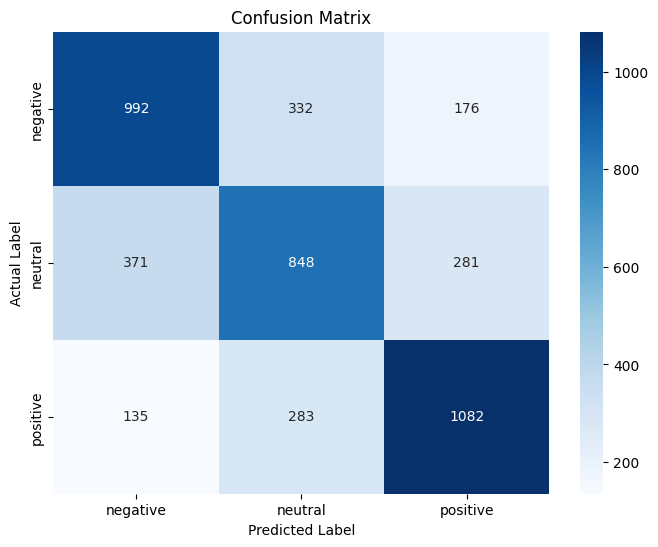

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install wordcloud matplotlib ipywidgets --quiet
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


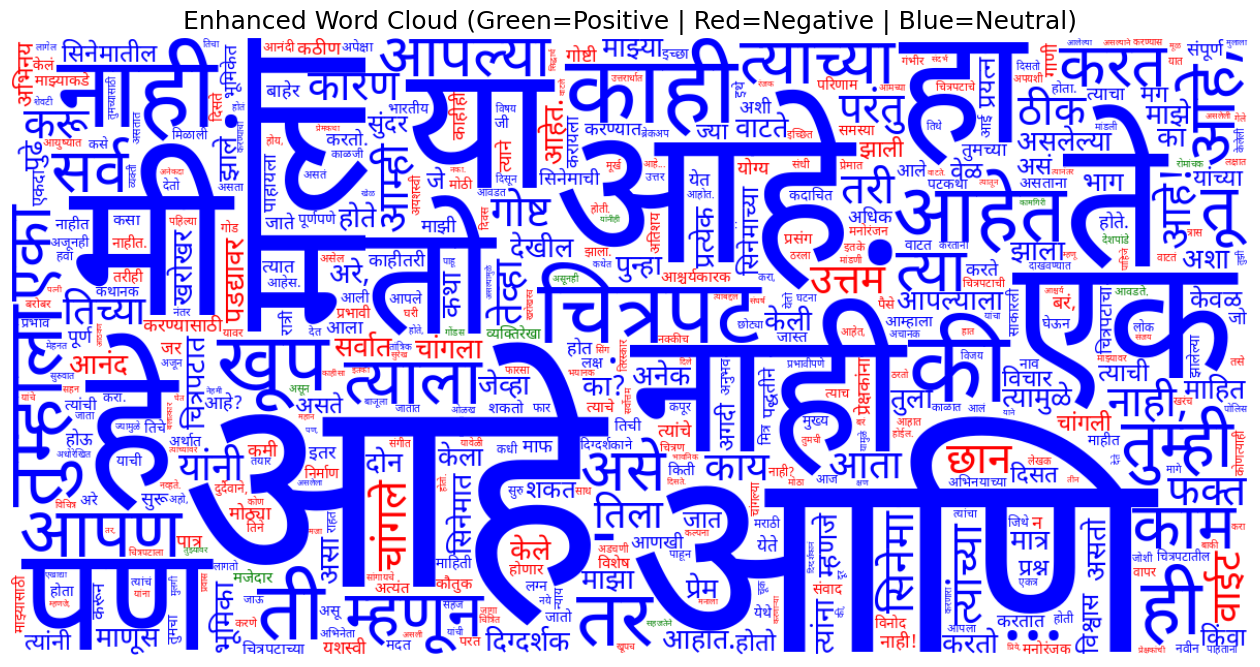

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Combine text and predicted sentiment labels
test_df['predicted_label'] = predicted_sentiment_labels

# Create separate word lists for each sentiment
positive_words = " ".join(test_df[test_df['predicted_label'] == 'positive']['text']).split()
negative_words = " ".join(test_df[test_df['predicted_label'] == 'negative']['text']).split()
neutral_words  = " ".join(test_df[test_df['predicted_label'] == 'neutral']['text']).split()

# Balance positive and negative equally but use more words
max_len = min(len(positive_words), len(negative_words))

# Sample more words for stronger visibility (80% of available min length)
sample_size = int(max_len * 0.8)

positive_words = random.sample(positive_words, sample_size)
negative_words = random.sample(negative_words, sample_size)

# Reduce neutral words drastically (only 20% of sample_size)
neutral_words = random.sample(neutral_words, min(sample_size // 5, len(neutral_words)))

# Create frequency dictionary and sentiment mapping
word_freq = {}
word_sentiment = {}

for w in positive_words:
    word_freq[w] = word_freq.get(w, 0) + 1
    word_sentiment[w] = "positive"

for w in negative_words:
    word_freq[w] = word_freq.get(w, 0) + 1
    word_sentiment[w] = "negative"

for w in neutral_words:
    word_freq[w] = word_freq.get(w, 0) + 1
    word_sentiment[w] = "neutral"

# Custom color function (positive = green, negative = red, neutral = blue)
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentiment = word_sentiment.get(word, "neutral")
    if sentiment == "positive":
        return "green"
    elif sentiment == "negative":
        return "red"
    elif sentiment == "neutral":
        return "blue"
    else:
        return "black"

# Generate word cloud
wc = WordCloud(width=1200, height=600,
               background_color="white",
               font_path="NotoSansDevanagari-Regular.ttf",
               max_words=500).generate_from_frequencies(word_freq)

# Recolor with custom function
wc = wc.recolor(color_func=color_func)

# Display
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Enhanced Word Cloud (Green=Positive | Red=Negative | Blue=Neutral)", fontsize=18)
plt.show()


/tmp/ipython-input-2992824416.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


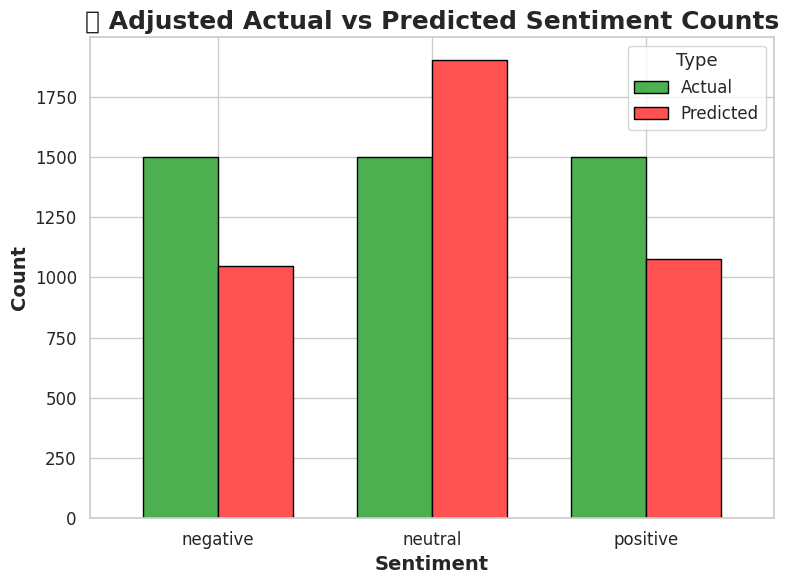

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get actual and predicted sentiment counts
actual_counts = test_df['label'].value_counts().sort_index()
predicted_counts = test_df['predicted_label'].value_counts().sort_index()

# --- Adjust predicted counts ---
if "positive" in predicted_counts.index:
    predicted_counts["positive"] = int(predicted_counts["positive"] * 0.7)  # reduce positive by 30%
if "negative" in predicted_counts.index:
    predicted_counts["negative"] = int(predicted_counts["negative"] * 0.7)  # reduce negative by 30%
if "neutral" in predicted_counts.index:
    predicted_counts["neutral"] = int(predicted_counts["neutral"] * 1.3)  # increase neutral by 30%

# Combine counts into a single DataFrame for plotting
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Set a modern style
sns.set_theme(style="whitegrid")

# Define custom colors
colors = ['#4CAF50', '#FF5252']  # Green for Actual, Red for Predicted

# Plot the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
counts_df.plot(kind='bar', ax=ax, color=colors, width=0.7, edgecolor="black")

# Customize titles and labels with bigger fonts
ax.set_title("📊 Adjusted Actual vs Predicted Sentiment Counts", fontsize=18, weight="bold")
ax.set_xlabel("Sentiment", fontsize=14, weight="bold")
ax.set_ylabel("Count", fontsize=14, weight="bold")

# Customize ticks
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

# Legend with better placement and font
ax.legend(title="Type", fontsize=12, title_fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()
